In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from scipy.stats import skew, kurtosis, normaltest
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [33]:
df = pd.read_csv("data/car_fuel_efficiency.csv")

## EDA

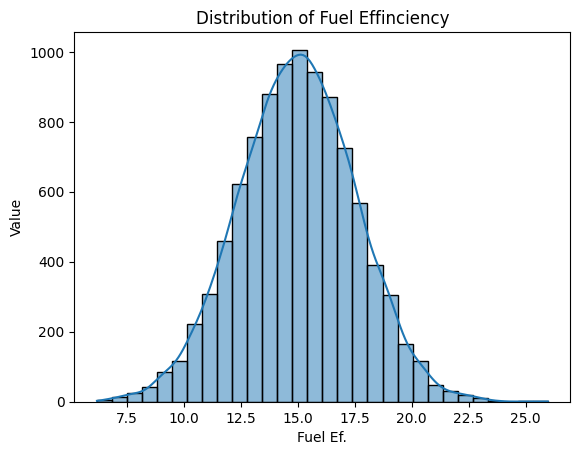

In [ ]:
df[["fuel_efficiency_mpg"]]

sns.histplot(data=df, x='fuel_efficiency_mpg', bins=30, kde=True)

plt.title("Distribution of Fuel Effinciency")
plt.xlabel("Fuel Ef.")
plt.ylabel("Value")
plt.show()

In [35]:
df_ef = df["fuel_efficiency_mpg"].dropna()

mean = df_ef.mean()
std = df_ef.std()
skewness = skew(df_ef)
kurt = kurtosis(df_ef)
_, pval = normaltest(df_ef)

print(f"Mean: {mean:.2f}")
print(f"Std dev: {std:.2f}")
print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurt:.2f}") #0.02, they look pretty average
print(f"Normality test p-value: {pval:.4f}")

Mean: 14.99
Std dev: 2.56
Skewness: -0.01
Kurtosis: 0.02
Normality test p-value: 0.7932


Distribution histogram is close to normal, kurtosis very close to 0 so tails are quite avereage

## Questions

In [36]:
cols = [
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year',
    'fuel_efficiency_mpg'
]
df = df[cols]

df.describe()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
count,9704.000000,8996.000000,9704.000000,9704.000000,9704.000000
mean,199.708368,149.657292,3001.280993,2011.484027,14.985243
std,49.455319,29.879555,497.894860,6.659808,2.556468
min,10.000000,37.000000,952.681761,2000.000000,6.200971
25%,170.000000,130.000000,2666.248985,2006.000000,13.267459
50%,200.000000,149.000000,2993.226296,2012.000000,15.006037
75%,230.000000,170.000000,3334.957039,2017.000000,16.707965
max,380.000000,271.000000,4739.077089,2023.000000,25.967222


### Question 1 
There's one column with missing values. What is it?



In [37]:
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [38]:
for column in df.columns:
    print(f"{column} missing {df[column].isnull().sum()} records")

engine_displacement missing 0 records
horsepower missing 708 records
vehicle_weight missing 0 records
model_year missing 0 records
fuel_efficiency_mpg missing 0 records


Horsepower is missing 708 records

### Question 2
What's the median (50% percentile) for variable 'horsepower'?

Looking at the summary, it's 149.000000

In [39]:
df_2 = df['horsepower'].fillna(df['horsepower'].median())
df_2.describe()


count    9704.000000
mean      149.609336
std        28.769305
min        37.000000
25%       131.000000
50%       149.000000
75%       168.000000
max       271.000000
Name: horsepower, dtype: float64

### Question 3

In [ ]:


df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)
df_train, temp_df = train_test_split(df_shuffled, test_size=0.4, random_state=42)
df_val, df_test = train_test_split(temp_df, test_size=0.5, random_state=42)

print(f"df_train: {len(df_train)} rows")
print(f"df_val:   {len(df_val)} rows")
print(f"df_test:  {len(df_test)} rows")


df_train: 5822 rows
df_val:   1941 rows
df_test:  1941 rows


In [41]:
df_train.describe()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
count,5822.000000,5402.000000,5822.000000,5822.000000,5822.000000
mean,199.991412,149.282118,3001.112625,2011.387839,14.981236
std,49.114648,30.074302,498.061588,6.678499,2.559929
min,30.000000,37.000000,1223.298226,2000.000000,6.695483
25%,170.000000,129.000000,2669.290560,2005.000000,13.263651
50%,200.000000,149.000000,2992.996458,2011.000000,14.989438
75%,230.000000,169.000000,3334.943116,2017.000000,16.696242
max,380.000000,271.000000,4739.077089,2023.000000,23.759123


In [ ]:


df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)
df_train, temp_df = train_test_split(df_shuffled, test_size=0.4, random_state=42)
df_val, df_test = train_test_split(temp_df, test_size=0.5, random_state=42)

print(f"df_train: {len(df_train)} rows")
print(f"df_val:   {len(df_val)} rows")
print(f"df_test:  {len(df_test)} rows")

x_columns = ["engine_displacement", "horsepower", "vehicle_weight", "model_year"]
y_column = "fuel_efficiency_mpg"

rmse_scores_1 = {}

# With Mean ---------------------

df_train_mean = df_train.copy()
df_train_mean["horsepower"] = df_train_mean["horsepower"].fillna(df_train["horsepower"].mean())

df_val_mean = df_val.copy()
df_val_mean["horsepower"] = df_val_mean["horsepower"].fillna(df_train["horsepower"].mean())

X_train_mean = df_train_mean[x_columns]
y_train_mean = df_train_mean[y_column] 
X_val_mean   = df_val_mean[x_columns]
y_val_mean   = df_val_mean[y_column]

lr_mean = LinearRegression()
lr_mean.fit(X_train_mean, y_train_mean)

preds_mean = lr_mean.predict(X_val_mean)
rmse_mean = float(np.sqrt(mean_squared_error(y_val_mean, preds_mean)))
rmse_scores_1["mean"] = round(rmse_mean, 2)

# With Zero ---------------------

df_train_zero = df_train.copy()
df_train_zero["horsepower"] = df_train_zero["horsepower"].fillna(0)

df_val_zero = df_val.copy()
df_val_zero["horsepower"] = df_val_zero["horsepower"].fillna(0)

X_train_zero = df_train_zero[x_columns]
y_train_zero = df_train_zero[y_column]
X_val_zero   = df_val_zero[x_columns]
y_val_zero   = df_val_zero[y_column]

lr_zero = LinearRegression()
lr_zero.fit(X_train_zero, y_train_zero)

preds_zero = lr_zero.predict(X_val_zero)
rmse_zero = float(np.sqrt(mean_squared_error(y_val_zero, preds_zero)))
rmse_scores_1["zero"] = round(rmse_zero, 2)

print(rmse_scores_1)

df_train: 5822 rows
df_val:   1941 rows
df_test:  1941 rows
{'mean': 0.46, 'zero': 0.51}


The one we used the mean for has a smaller average error and so it's a better fit that the one we used the 0s

### Question 4

In [ ]:
from sklearn.linear_model import Ridge #L2
from sklearn.metrics import mean_squared_error
import numpy as np

df_train_zero = df_train.copy()
df_val_zero = df_val.copy()

df_train_zero[x_columns] = df_train_zero[x_columns].fillna(0)
df_val_zero[x_columns] = df_val_zero[x_columns].fillna(0)

x_train = df_train_zero[x_columns]
y_train = df_train_zero[y_column]
x_val = df_val_zero[x_columns]
y_val = df_val_zero[y_column]

r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
rmse_scores_2 = {}

for r in r_values:
    model = Ridge(alpha=r, random_state=42)
    model.fit(x_train, y_train)
    preds = model.predict(x_val)
    rmse = np.sqrt(mean_squared_error(y_val, preds))
    rmse_scores_2[r] = round(float(rmse), 2)

for r, score in rmse_scores_2.items():
    print(f"r={r}: RMSE={score}")

print(rmse_scores_2)


r=0: RMSE=0.51
r=0.01: RMSE=0.51
r=0.1: RMSE=0.51
r=1: RMSE=0.51
r=5: RMSE=0.51
r=10: RMSE=0.51
r=100: RMSE=0.51
{0: 0.51, 0.01: 0.51, 0.1: 0.51, 1: 0.51, 5: 0.51, 10: 0.51, 100: 0.51}


In [ ]:
x_columns = ["engine_displacement", "horsepower", "vehicle_weight", "model_year"]
y_column = "fuel_efficiency_mpg"

seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores_3 = []

for seed in seeds:
    df_shuffled = df.sample(frac=1, random_state=seed).reset_index(drop=True)
    df_train, temp_df = train_test_split(df_shuffled, test_size=0.4, random_state=seed)
    df_val, df_test = train_test_split(temp_df, test_size=0.5, random_state=seed)

    df_train_zero = df_train.copy()
    df_val_zero = df_val.copy()
    df_train_zero["horsepower"] = df_train_zero["horsepower"].fillna(0)
    df_val_zero["horsepower"] = df_val_zero["horsepower"].fillna(0)

    x_train = df_train_zero[x_columns]
    y_train = df_train_zero[y_column]
    x_val   = df_val_zero[x_columns]
    y_val   = df_val_zero[y_column]

    lr = LinearRegression()
    lr.fit(x_train, y_train)

    preds = lr.predict(x_val)
    rmse = float(np.sqrt(mean_squared_error(y_val, preds)))
    rmse_scores_3.append(round(rmse, 2))

std_rmse = round(np.std(rmse_scores_3), 3)

print("RMSE:", rmse_scores_3)
print(f"STDE of RMSE: {std_rmse}")

RMSE per seed: [0.52, 0.51, 0.51, 0.52, 0.52, 0.52, 0.52, 0.52, 0.51, 0.53]
Standard deviation of RMSE: 0.006


In [50]:

x_columns = ["engine_displacement", "horsepower", "vehicle_weight", "model_year"]
y_column = "fuel_efficiency_mpg"

df_shuffled = df.sample(frac=1, random_state=9).reset_index(drop=True)
df_train, temp_df = train_test_split(df_shuffled, test_size=0.4, random_state=9)
df_val, df_test   = train_test_split(temp_df, test_size=0.5, random_state=9)

print(f"df_train: {len(df_train)} rows")
print(f"df_val:   {len(df_val)} rows")
print(f"df_test:  {len(df_test)} rows")

df_full_train = pd.concat([df_train, df_val]).reset_index(drop=True)

df_full_train = df_full_train.fillna(0)
df_test = df_test.fillna(0)

x_train_full = df_full_train[x_columns]
y_train_full = df_full_train[y_column]
x_test = df_test[x_columns]
y_test = df_test[y_column]

ridge = Ridge(alpha=0.001, random_state=9)
ridge.fit(x_train_full, y_train_full)

preds_test = ridge.predict(x_test)
rmse_test = float(np.sqrt(mean_squared_error(y_test, preds_test)))
rmse_test = round(rmse_test, 2)

print(f"RMSE: {rmse_test}")

df_train: 5822 rows
df_val:   1941 rows
df_test:  1941 rows
RMSE: 0.53
